In [1]:
import pandas as pd
import numpy as np

In [2]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [4]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')


In [5]:
dataset.head()

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1.0,8.0,43.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,25.951557,86.886038,2
1,1.0,7.0,11.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,1.0,24.691358,100.644197,1
2,1.0,9.0,41.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,27.548209,95.928640,1
3,1.0,11.0,48.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,26.122449,73.203730,2
4,1.0,11.0,30.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,1.0,22.038567,105.714492,1


In [6]:
dataset.shape

(1000000, 29)

In [7]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [8]:
#dataset.iloc[:,:-1]

In [9]:
#dataset.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
scaler = MinMaxScaler()

# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# # new_y = np.asarray(y)
# # (unique,counts) = np.unique(new_y,return_counts =True)
# # print(unique)
# # print(counts)
# # print(new_y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# y_train = to_categorical(y_train,dtype="uint8")
# #print(y_train_new.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [11]:
# classes = {1:0, 2:1, 3:2, 4:3, 5:4}
# dataset['stage']=dataset['stage'].replace(to_replace=classes)

In [12]:
# X = dataset.drop('stage',axis='columns')
# y = dataset['stage']


In [13]:
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [14]:

X = scaler.fit_transform(X)




In [15]:
# y.value_counts()

In [16]:
from imblearn.over_sampling import SMOTE
strategy = {1:475386, 2:486184, 3:36377, 4:36377, 5:36377}

smote = SMOTE(sampling_strategy=strategy)
X_sm,y_sm =smote.fit_resample(X,y)
print(len(X_sm))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

1070701


In [17]:
from collections import Counter
Counter(y_sm)

Counter({1: 475386, 2: 486184, 3: 36377, 4: 36377, 5: 36377})

In [18]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)
# #print(y_train_new.shape)

print(X_train.shape,y_train.shape)
y_train = to_categorical(y_train,dtype="uint8")
print(y_train.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)

(856560, 28) (856560,)
(856560, 6)
(214141, 6)


In [19]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(856560, 28, 1)
(214141, 28, 1)


In [20]:
from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, SimpleRNN


def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(8, activation="relu"))  
  model.add(keras.layers.Dense (64,activation='relu')) #input layer
  model.add(Dropout(0.2))

  model.add(keras.layers.Dense (32,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (16,activation='relu')) #hidden
  model.add(Dropout(0.3))
  model.add(keras.layers.Dense (6,activation='softmax')) #output

  epochs = 400
  batch_size = 64
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs= 25, batch_size=128, verbose=1)
  # val_acc = model.evaluate(X_val, y_val, verbose = 1)
  # predictions = model.predict_classes(X_test)
  # print(classification_report(y_test,predictions))
  # print(confusion_matrix(y_test,predictions))
  return history, model

#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())

Epoch 1/25
6692/6692 [==============================] - 44s 6ms/step - loss: 0.4704 - accuracy: 0.7891 - val_loss: 0.2690 - val_accuracy: 0.8927
Epoch 2/25
6692/6692 [==============================] - 43s 6ms/step - loss: 0.1952 - accuracy: 0.9294 - val_loss: 0.1114 - val_accuracy: 0.9730
Epoch 3/25
6692/6692 [==============================] - 43s 6ms/step - loss: 0.1340 - accuracy: 0.9614 - val_loss: 0.0708 - val_accuracy: 0.9802
Epoch 4/25
6692/6692 [==============================] - 43s 6ms/step - loss: 0.1037 - accuracy: 0.9722 - val_loss: 0.0362 - val_accuracy: 0.9918
Epoch 5/25
6692/6692 [==============================] - 43s 6ms/step - loss: 0.0858 - accuracy: 0.9786 - val_loss: 0.0320 - val_accuracy: 0.9961
Epoch 6/25
6692/6692 [==============================] - 45s 7ms/step - loss: 0.0779 - accuracy: 0.9818 - val_loss: 0.0384 - val_accuracy: 0.9919
Epoch 7/25
6692/6692 [==============================] - 44s 7ms/step - loss: 0.0704 - accuracy: 0.9839 - val_loss: 0.0199 - val_ac

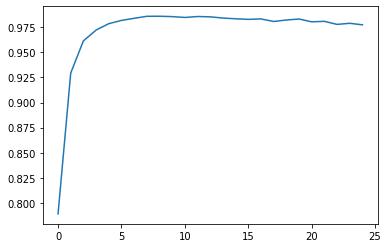

In [21]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [22]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[1.2049225e-14 2.4473032e-01 7.5394034e-01 6.8357957e-33 0.0000000e+00
  1.3293718e-03]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [2.3166169e-08 3.3212316e-04 9.0454310e-01 9.4046786e-02 4.9016558e-06
  1.0730856e-03]
 ...
 [0.0000000e+00 9.9998510e-01 6.5826549e-07 0.0000000e+00 0.0000000e+00
  1.4186456e-05]
 [0.0000000e+00 9.9999928e-01 2.2603576e-10 0.0000000e+00 0.0000000e+00
  6.7842501e-07]
 [0.0000000e+00 9.9997652e-01 1.9564047e-06 0.0000000e+00 0.0000000e+00
  2.1517015e-05]]
[2 5 2 ... 1 1 1]


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# pl.plot()
# plt.show()

[[94794   142     0     0     1]
 [    5 97160    20     2     1]
 [    0   454  6718   100     0]
 [    0     0     4  7175   217]
 [   58   154    83    31  7022]]


In [24]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.99



In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.994059988512242
0.994059988512242
0.994059988512242


In [26]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']))





Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00     94937
     Class 2       0.99      1.00      1.00     97188
     Class 3       0.98      0.92      0.95      7272
     Class 4       0.98      0.97      0.98      7396
     Class 5       0.97      0.96      0.96      7348

    accuracy                           0.99    214141
   macro avg       0.99      0.97      0.98    214141
weighted avg       0.99      0.99      0.99    214141



In [27]:
target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']

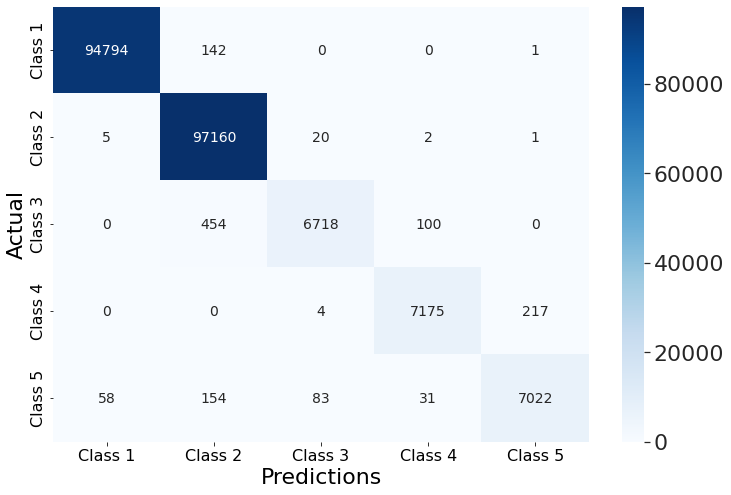

In [28]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (12, 8))
target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5',]
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 2)
sn.heatmap(df_cm,annot=True,annot_kws={"size":14},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.xticks(fontsize =16)
plt.yticks(fontsize =16)
plt.savefig('SimpleRNN-ANN_ConfusionMatrix.png', dpi=300)
# from mlxtend.plotting import plot_confusion_matrix
# fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# plt.xlabel('Predictions',fontsize=18)
# plt.ylabel('Actual',fontsize=18)
# plt.show()

In [29]:
from google.colab import files
files.download('SimpleRNN-ANN_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

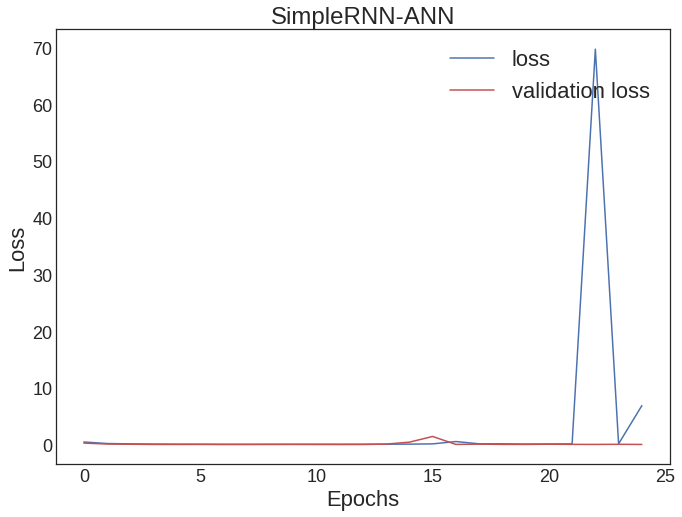

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
fig = plt.gcf()
fig.set_size_inches(11,8, forward=True)
# fig = plt.subplots(1,1, figsize = (12, 8))
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('SimpleRNN-ANN.png', dpi=100)

In [31]:
from google.colab import files
files.download('SimpleRNN-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

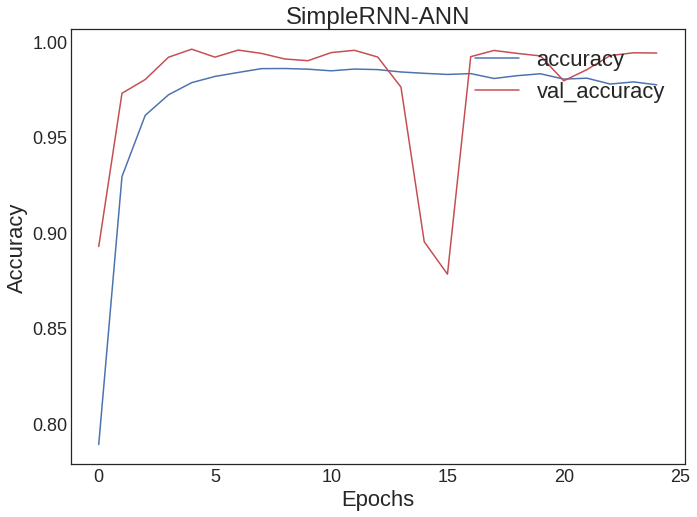

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
fig = plt.gcf()
fig.set_size_inches(11,8, forward=True)
#fig = plt.subplots(1,1, figsize = (12, 8))
# fig = plt.figure()
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Accuracy',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.show()
plt.savefig('SimpleRNN-ANN_accuracy.png', dpi=300)

In [33]:
from google.colab import files
files.download('SimpleRNN-ANN_accuracy.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.983861527928244


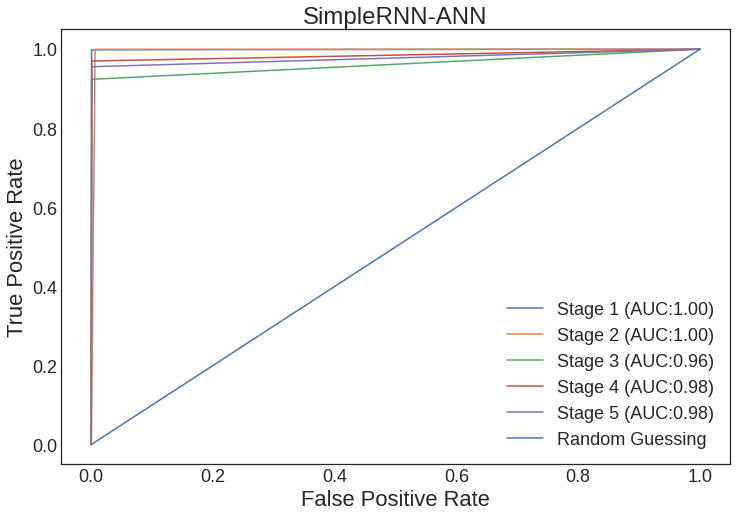

In [34]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('SimpleRNN-ANN',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('SimpleRNN-ANN_AUC.png', dpi=300)
plt.show()


In [35]:
from google.colab import files
files.download('SimpleRNN-ANN_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# #plt.style.use('seaborn-white')

# target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# # set plot figure size
# fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_classes_1)
#     y_test = lb.transform(y_classes_1)
#     y_pred = lb.transform(y_classes)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
#         c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)
# print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
# c_ax.legend(fontsize=18,)
# #c_ax.legend()
# c_ax.set_xlabel('False Positive Rate',)
# c_ax.set_ylabel('True Positive rate')
# plt.show()



In [37]:
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D

# def evaluate_model_LSTM(X_train, X_val, y_train, y_val):
#   model = LSTM
#   timesteps=125
#   dims=4
#   model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(X_train.shape[1],1)))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
#   model.add(keras.layers.Dense (64,activation='relu')) #input layer
#   model.add(Dropout(0.2))
#   model.add(keras.layers.Dense (32,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (16,activation='relu')) #hidden
#   model.add(Dropout(0.3))
#   model.add(keras.layers.Dense (6,activation='softmax')) #output


#   epochs = 400
#   batch_size = 64
#   model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#   model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100, batch_size=128, verbose=1)
#   val_acc = model.evaluate(X_val, y_val, verbose = 1)
#   return model, val_acc

# #model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
# # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())

In [38]:
# n_folds = 1
# cv_scores, model_history = list(), list()
# for _ in range(n_folds):  
#   # split data
#   # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
#   # evaluate model
#   print(X_train.shape)
#   print(y_train.shape)
#   print(X_test.shape)
#   print(y_test.shape)
#   model = tf.keras.Sequential()
#   model, test_acc = evaluate_model_LSTM(X_train, X_test, y_train, y_test)
# # list all data in history
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])